In [1]:
import rootutils
import os
rootutils.setup_root(os.getcwd(), pythonpath=True)

WindowsPath('E:/river_seg/airc')

In [2]:
from src.zero_shot.utils import sigmoid, prune

In [3]:

import torch
import numpy as np
import cv2
import skimage, sklearn
import scipy
import sam2
from sam2.build_sam import build_sam2, build_sam2_hf
from sam2.sam2_image_predictor import SAM2ImagePredictor as SAM
from scipy.ndimage import center_of_mass

In [4]:
sam2_checkpoint = r"E:/river_seg/checkpoints/sam2.1_hiera_s.pt"
model_cfg = r"E:/river_seg/venv/lib/site-packages/sam2/configs/sam2.1/sam2.1_hiera_s.yaml"  # or the config you use
predictor = build_sam2(model_cfg,sam2_checkpoint)

In [5]:
predictor = SAM(predictor)

In [7]:
from pathlib import Path
data_root = Path(r"E:/river_seg/airc/data/v2")
mask = cv2.imread(r"E:/river_seg/airc/data/v2/2015.png", cv2.IMREAD_UNCHANGED)[..., -1] > 0
keypoints = np.array([[2063, 1634], [542, 3641], [1094, 4955], [2775, 5737]], dtype=int)[:, ::-1]
patch_size = np.array([256, 256], dtype=int)
videos = [[] for i in range(keypoints.shape[0])]
masks = []
prompts = []
for filename in os.listdir(data_root):
    path = data_root / filename
    image = cv2.imread(path, cv2.IMREAD_UNCHANGED)[..., :3]
    for index, kp in enumerate(keypoints):
        src, dst = kp - patch_size, kp + patch_size
        videos[index].append(image[src[0]:dst[0], src[1]:dst[1], ::-1].copy())
        masks.append(mask[src[0]:dst[0], src[1]:dst[1]].copy())
        prompts.append(np.array(center_of_mass(masks[-1] > 0)).astype(int))

     

In [8]:
def predict(logit, beta): 
    prob_map = sigmoid(logit)
    quantized = np.interp(prob_map ** 1.5, (0, 1), (0, 255)).astype(np.uint8)
    print("Quantized shape:", quantized.shape)
    beta_mask = (quantized >= int(beta * 255)).astype(np.uint8)
    b1 = cv2.adaptiveThreshold(quantized, 
                                        1, 
                                        cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                        cv2.THRESH_BINARY, 
                                        91, 
                                        -15) * (quantized > 50) 
    b2 = cv2.adaptiveThreshold(quantized, 
                                        1, 
                                        cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                        cv2.THRESH_BINARY, 
                                        121, 
                                        -15) * (quantized > 80)
    res = np.maximum(beta_mask, np.maximum(b1, b2))
    res = prune(mask, min_size=500)
    return res

In [20]:
segs = [[masks[i].copy().astype(np.uint8)] for i in range(keypoints.shape[0])]
logis = [[] for i in range(keypoints.shape[0])]


(512, 512, 3)
(512,) uint8
(256, 256) uint8


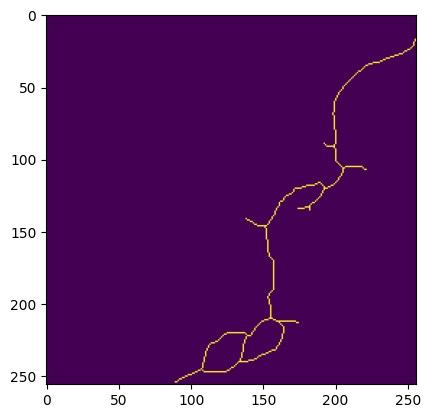

(512, 512)
Quantized shape: (512, 512)
(512, 512, 3)
(512,) uint8
(256, 256) uint8


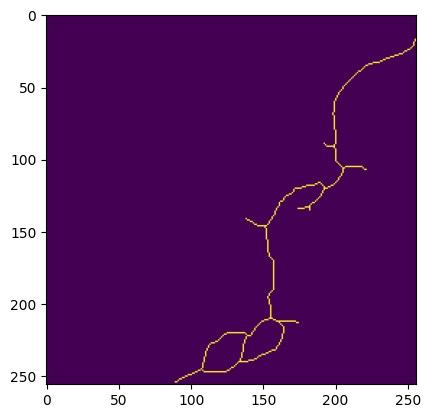

(512, 512)
Quantized shape: (512, 512)
(512, 512, 3)
(512,) uint8
(256, 256) uint8


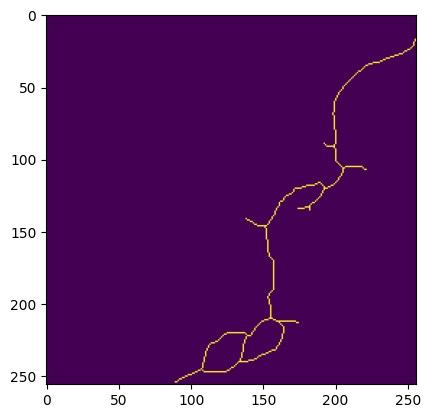

(512, 512)
Quantized shape: (512, 512)
(512, 512, 3)
(512,) uint8
(256, 256) uint8


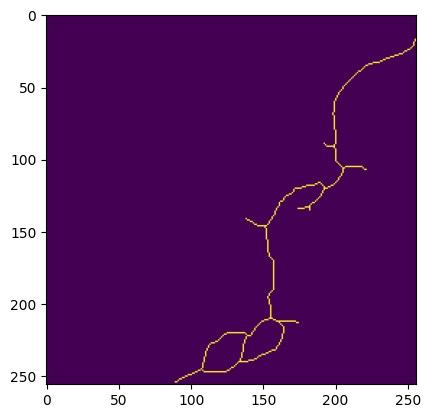

(512, 512)
Quantized shape: (512, 512)
(512, 512, 3)
(512,) uint8
(256, 256) uint8


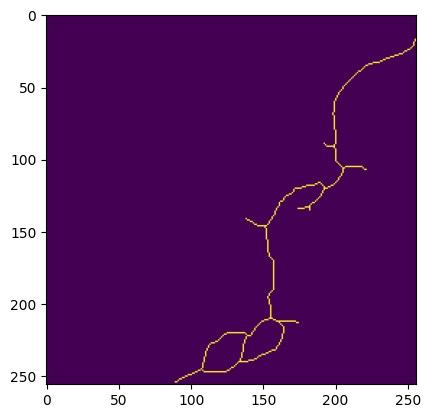

(512, 512)
Quantized shape: (512, 512)
(512, 512, 3)
(512,) uint8
(256, 256) uint8


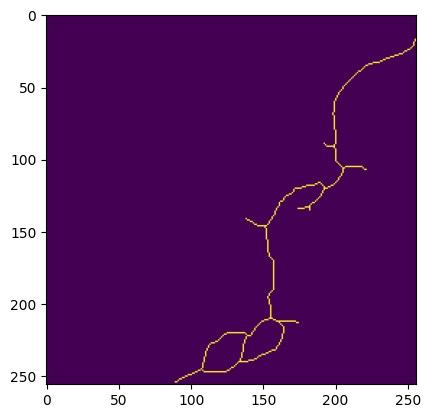

(512, 512)
Quantized shape: (512, 512)
(512, 512, 3)
(512,) uint8
(256, 256) uint8


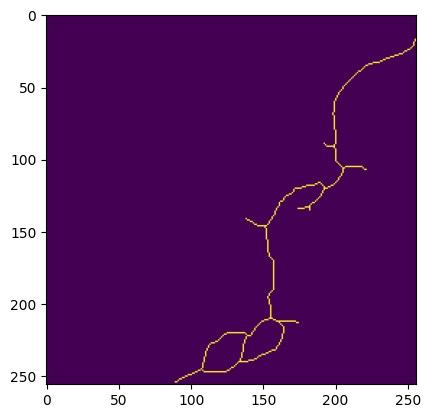

(512, 512)
Quantized shape: (512, 512)
(512, 512, 3)
(512,) uint8
(256, 256) uint8


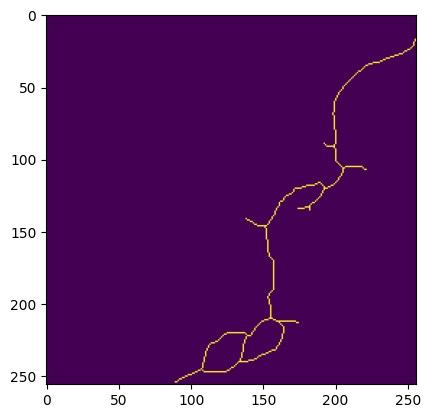

(512, 512)
Quantized shape: (512, 512)
(512, 512, 3)
(512,) uint8
(256, 256) uint8


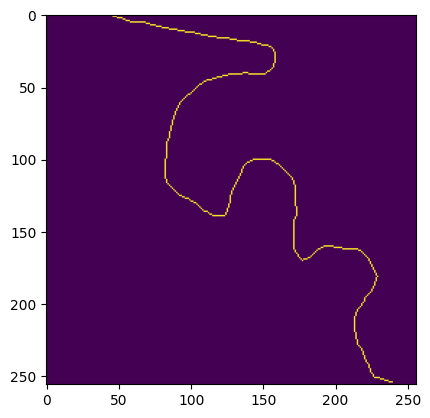

(512, 512)
Quantized shape: (512, 512)
(512, 512, 3)
(512,) uint8
(256, 256) uint8


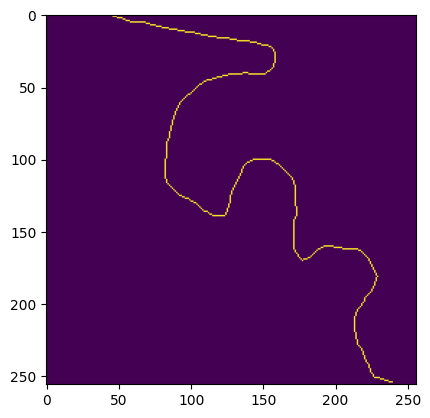

(512, 512)
Quantized shape: (512, 512)
(512, 512, 3)
(512,) uint8
(256, 256) uint8


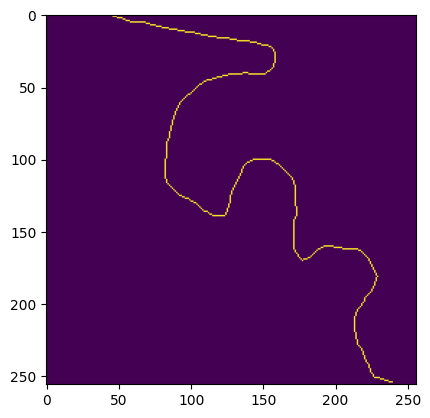

(512, 512)
Quantized shape: (512, 512)
(512, 512, 3)
(512,) uint8
(256, 256) uint8


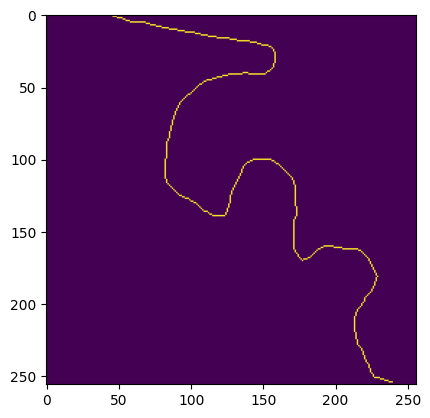

(512, 512)
Quantized shape: (512, 512)
(512, 512, 3)
(512,) uint8
(256, 256) uint8


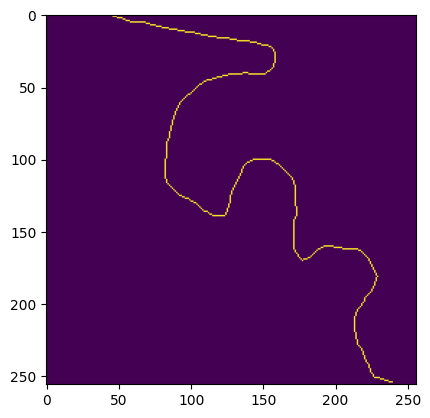

(512, 512)
Quantized shape: (512, 512)
(512, 512, 3)
(512,) uint8
(256, 256) uint8


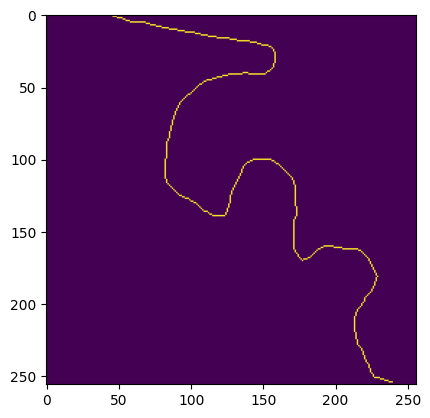

(512, 512)
Quantized shape: (512, 512)
(512, 512, 3)
(512,) uint8
(256, 256) uint8


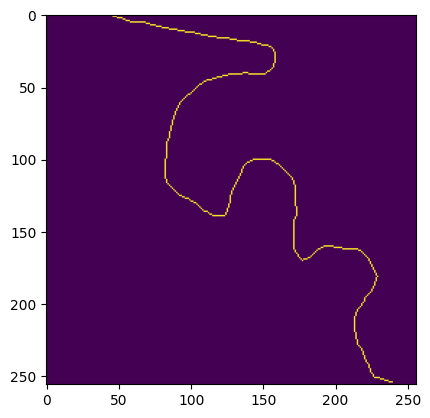

(512, 512)
Quantized shape: (512, 512)
(512, 512, 3)
(512,) uint8
(256, 256) uint8


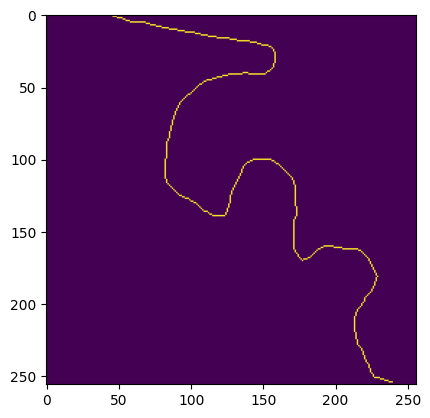

(512, 512)
Quantized shape: (512, 512)
(512, 512, 3)
(512,) uint8
(256, 256) uint8


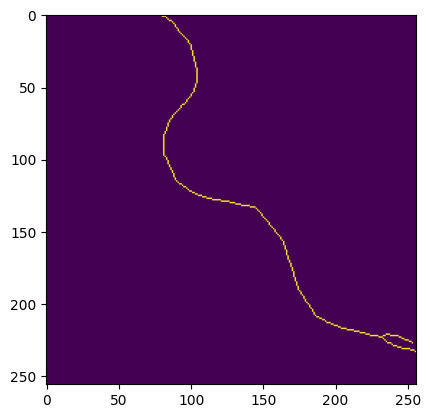

(512, 512)
Quantized shape: (512, 512)
(512, 512, 3)
(512,) uint8
(256, 256) uint8


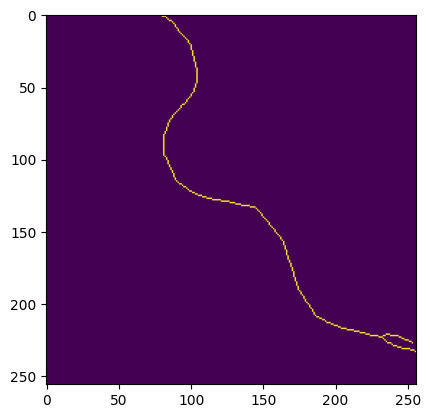

(512, 512)
Quantized shape: (512, 512)
(512, 512, 3)
(512,) uint8
(256, 256) uint8


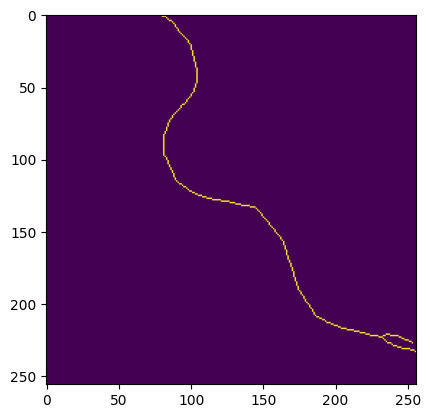

(512, 512)
Quantized shape: (512, 512)
(512, 512, 3)
(512,) uint8
(256, 256) uint8


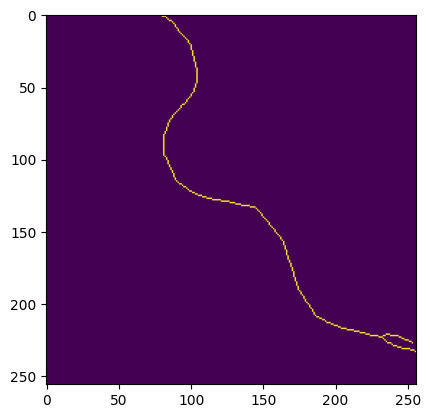

(512, 512)
Quantized shape: (512, 512)
(512, 512, 3)
(512,) uint8
(256, 256) uint8


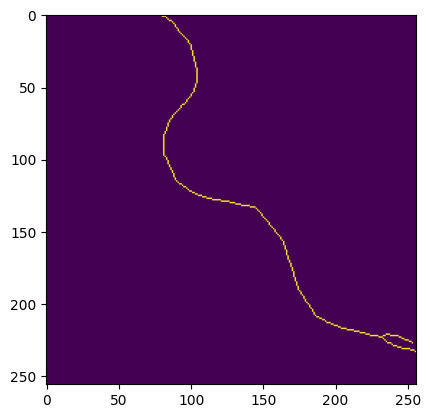

(512, 512)
Quantized shape: (512, 512)
(512, 512, 3)
(512,) uint8
(256, 256) uint8


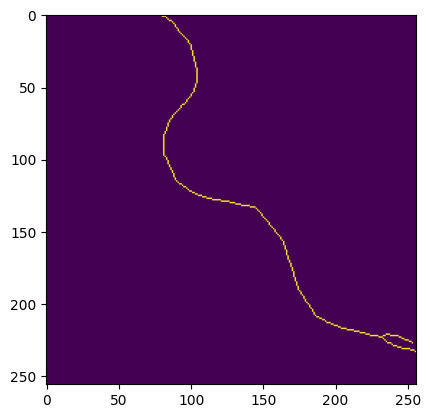

(512, 512)
Quantized shape: (512, 512)
(512, 512, 3)
(512,) uint8
(256, 256) uint8


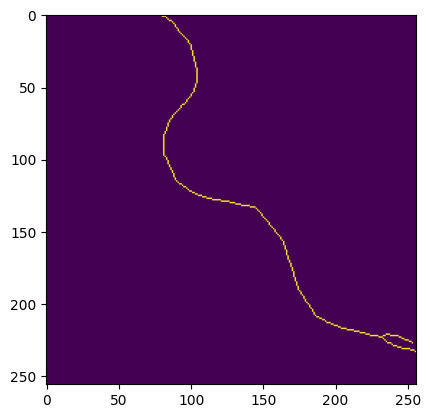

(512, 512)
Quantized shape: (512, 512)
(512, 512, 3)
(512,) uint8
(256, 256) uint8


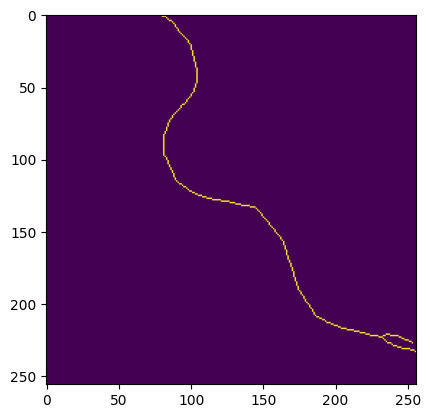

(512, 512)
Quantized shape: (512, 512)
(512, 512, 3)
(512,) uint8
(256, 256) uint8


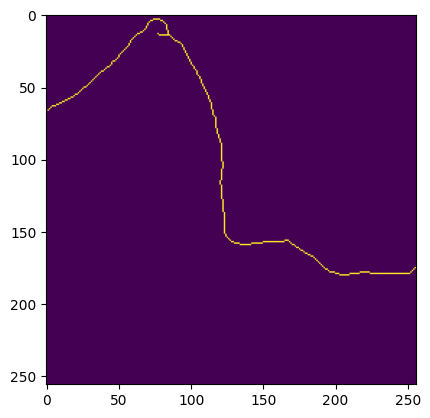

(512, 512)
Quantized shape: (512, 512)
(512, 512, 3)
(512,) uint8
(256, 256) uint8


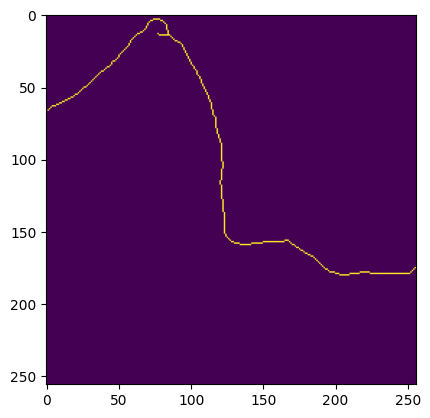

(512, 512)
Quantized shape: (512, 512)
(512, 512, 3)
(512,) uint8
(256, 256) uint8


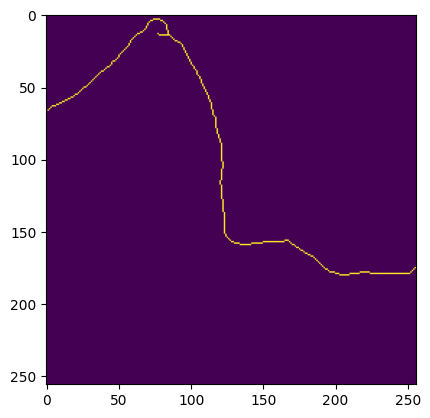

(512, 512)
Quantized shape: (512, 512)
(512, 512, 3)
(512,) uint8
(256, 256) uint8


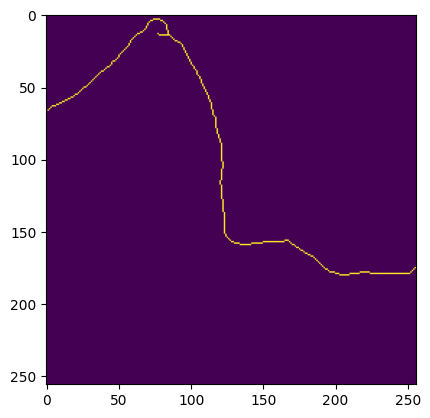

(512, 512)
Quantized shape: (512, 512)
(512, 512, 3)
(512,) uint8
(256, 256) uint8


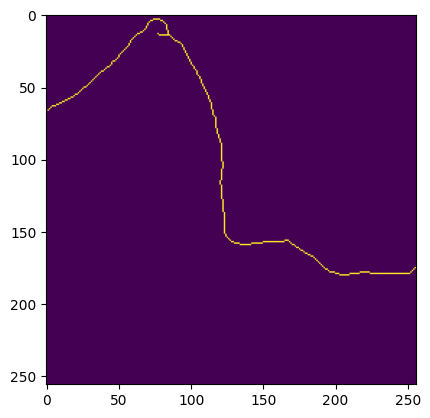

(512, 512)
Quantized shape: (512, 512)
(512, 512, 3)
(512,) uint8
(256, 256) uint8


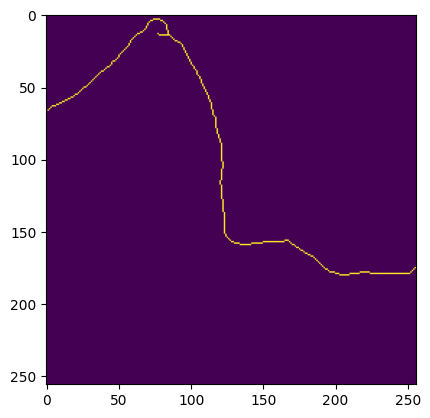

(512, 512)
Quantized shape: (512, 512)
(512, 512, 3)
(512,) uint8
(256, 256) uint8


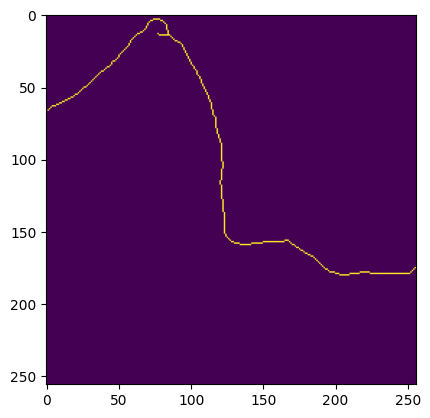

(512, 512)
Quantized shape: (512, 512)
(512, 512, 3)
(512,) uint8
(256, 256) uint8


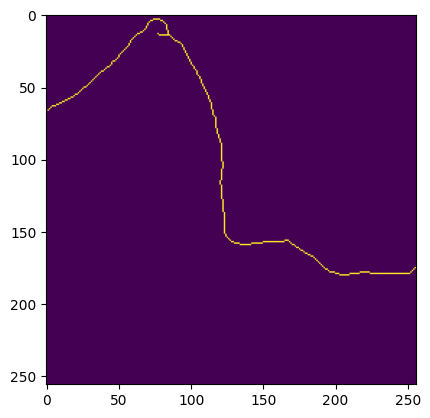

(512, 512)
Quantized shape: (512, 512)


: 

In [ ]:
for index, (mask, vid) in enumerate(zip(masks, videos)): 
    for i, frame in enumerate(vid):
        if i == 0:
            continue
        print(frame.shape)
        predictor.set_image(frame)
        m = segs[index][-1].copy()
        print(m[0].shape, m.dtype)
        prior = cv2.resize(m, (256, 256), cv2.INTER_NEAREST) 
        print(prior.shape, prior.dtype)
        prior_mask = skimage.morphology.skeletonize(prior)
        plt.imshow(prior_mask)
        plt.pause(0.2)
        _, _, logits = predictor.predict(point_coords=[prompts[index][::-1].tolist()], point_labels=[1], mask_input=prior_mask[None, :])
        logit = cv2.resize(cv2.GaussianBlur(logits[0], (3, 3), 0), patch_size * 2, interpolation=cv2.INTER_LINEAR)
        print(logit.shape)
        res = predict(logit, 0.6)
        logis[index].append(logit)
        segs[index].append(res)

In [22]:
import matplotlib.pyplot as plt


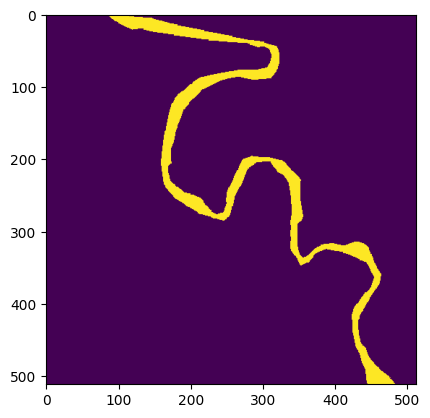

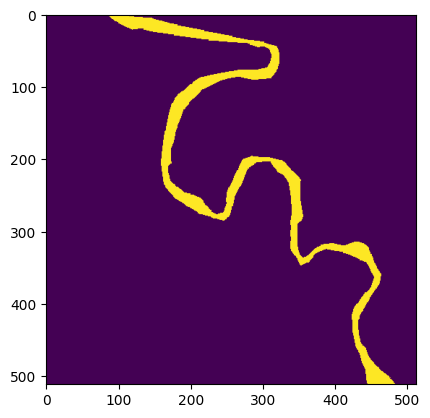

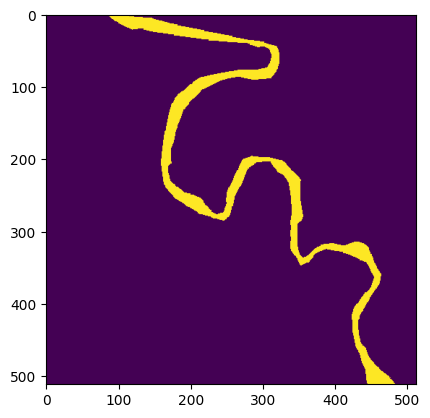

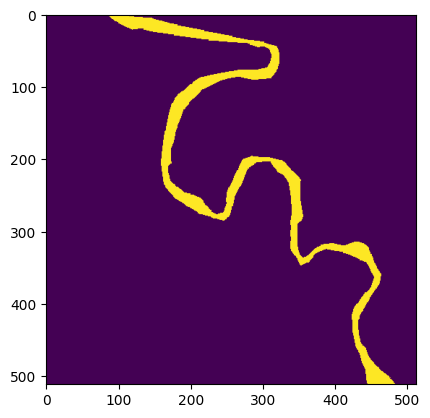

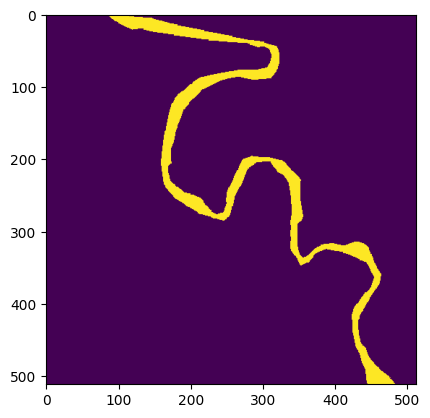

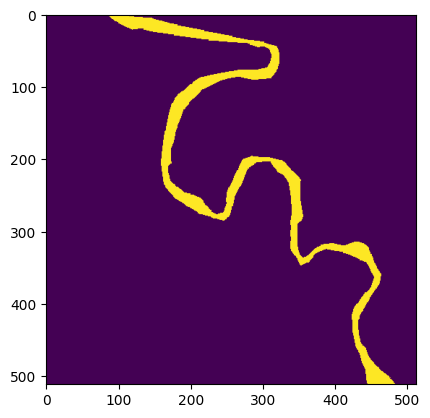

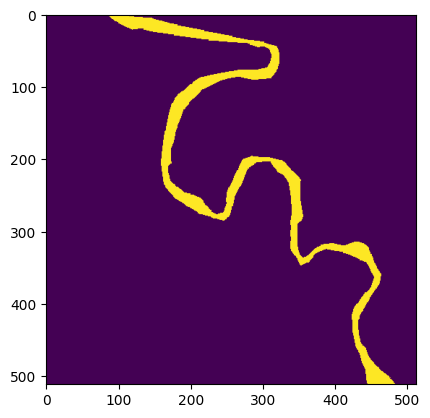

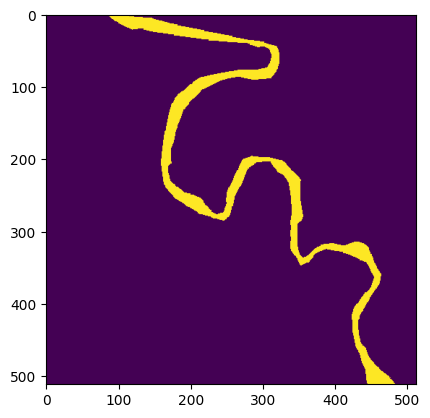

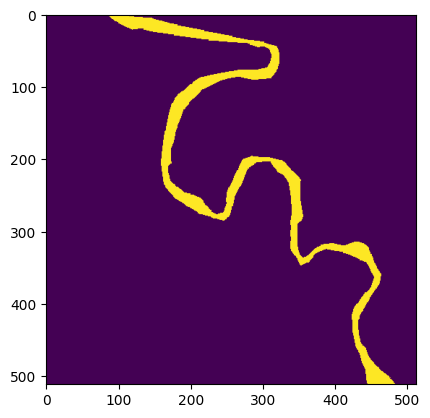

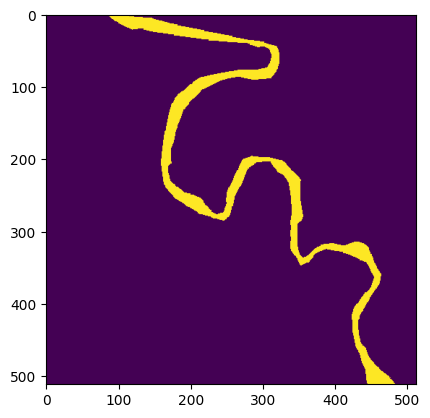

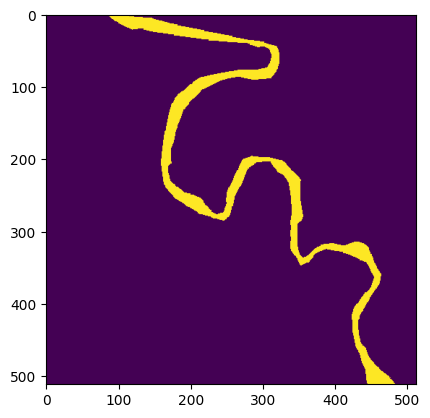

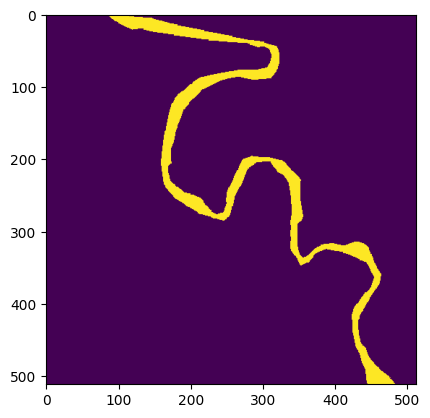

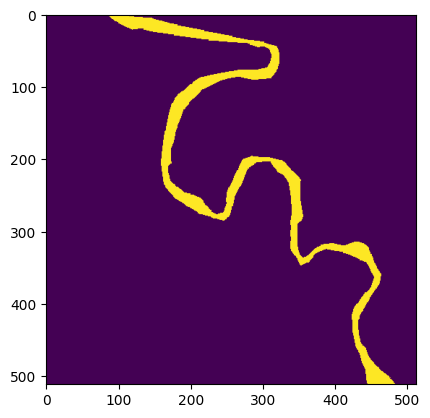

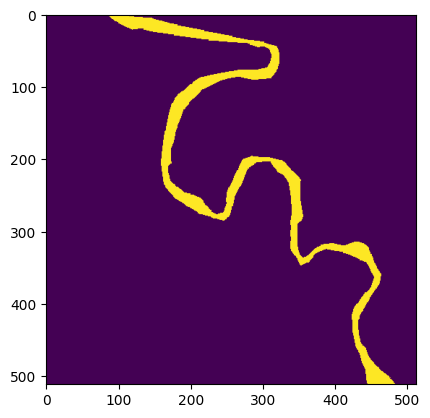

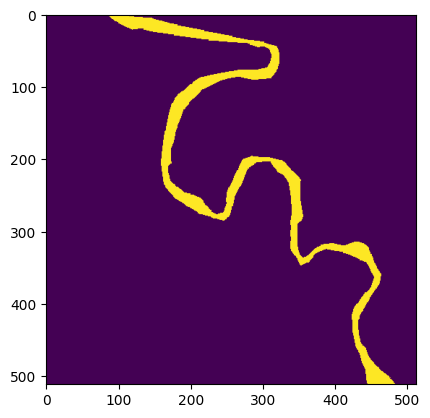

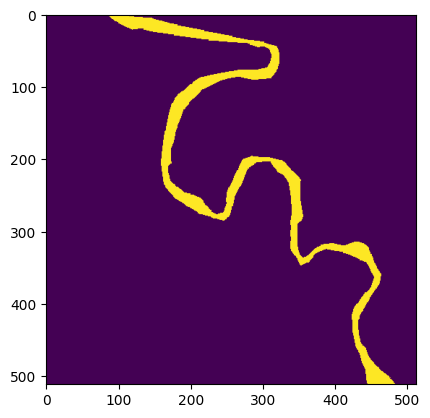

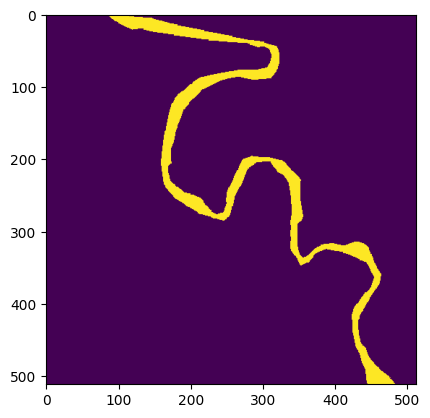

In [26]:
for i, y in enumerate(segs[1]):
    plt.imshow(y)
    plt.pause(0.2)

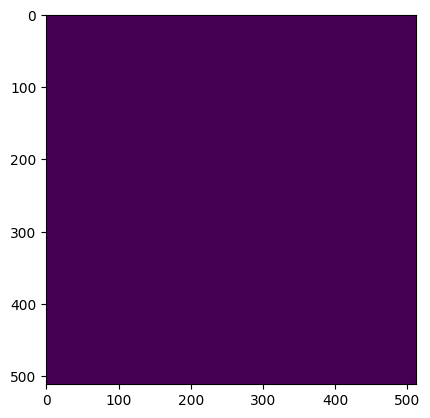

In [24]:
plt.imshow(segs[0][0] * (1 - segs[0][-1]))

In [ ]:
videos = [np.stack(vid, axis=0)[None, :] for vid in videos]

ValueError: need at least one array to stack

In [ ]:
vid_dir /"image"/ "0"

WindowsPath('E:/river_seg/airc/data/erosion/image/0')

In [ ]:
with torch.inference_mode(), torch.autocast("cuda", dtype=torch.bfloat16):
    state = predictor.init_state(video_path=r"E:/river_seg/airc/data/erosion/image/0")

frame loading (JPEG): 100%|██████████| 9/9 [00:00<00:00, 41.26it/s]


In [ ]:
with torch.inference_mode(), torch.autocast("cuda", dtype=torch.bfloat16):
    state = predictor.add_new_mask(
        inference_state=state,
        frame_idx=0,   # frame where prior_mask lives
        obj_id=1,      # choose an arbitrary object id
        mask=(masks[0] > 0),
    )

e:\river_seg\venv\lib\site-packages\sam2\sam2_video_predictor.py:786: UserWarning: cannot import name '_C' from 'sam2' (e:\river_seg\venv\lib\site-packages\sam2\__init__.py)

Skipping the post-processing step due to the error above. You can still use SAM 2 and it's OK to ignore the error above, although some post-processing functionality may be limited (which doesn't affect the results in most cases; see https://github.com/facebookresearch/sam2/blob/main/INSTALL.md).
  pred_masks_gpu = fill_holes_in_mask_scores(


In [ ]:
mask_frames = []  # {frame_idx: {obj_id: binary_mask}}

with torch.inference_mode(), torch.autocast("cuda", dtype=torch.bfloat16):
    for frame_idx, object_ids, masks in predictor.propagate_in_video(state):
        # 'masks' will be a torch tensor of the predicted masks for the current frame
        # Convert the masks to numpy and process as needed
        masks_np = masks.cpu().numpy()
        mask_frames.append(masks_np)

TypeError: tuple indices must be integers or slices, not str